## Importing Modules

In [185]:
import numpy as np
import pandas as pd
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math
%matplotlib inline

## Reading Data

In [16]:
energy_df = pd.read_excel('Actuals.xlsx')

## Looking at some of the data

In [3]:
energy_df.head()

,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh)
0,2017-03-18 00:00:00,1.031472e+06,1012.48000,2.125,79.333333,16.764386,285.25,6.25375
1,2017-03-18 01:00:00,1.007206e+06,1011.61875,0.000,82.166667,15.729386,285.00,9.20500
2,2017-03-18 02:00:00,9.861084e+05,1010.72000,2.125,81.666667,15.816886,316.00,11.28375
3,2017-03-18 03:00:00,9.707610e+05,1011.37625,17.125,82.250000,15.919386,327.00,7.16875
4,2017-03-18 04:00:00,9.622584e+05,1011.50000,18.625,82.333333,15.769386,282.25,0.78000


## Putting the variable to predict (load) as the last column

In [ ]:
energy_df_loadless = energy_df.drop(columns = ['Load (kW)'])

In [20]:
energy_df_loadless.head()

,Time,Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh)
0,2017-03-18 00:00:00,1012.48000,2.125,79.333333,16.764386,285.25,6.25375
1,2017-03-18 01:00:00,1011.61875,0.000,82.166667,15.729386,285.00,9.20500
2,2017-03-18 02:00:00,1010.72000,2.125,81.666667,15.816886,316.00,11.28375
3,2017-03-18 03:00:00,1011.37625,17.125,82.250000,15.919386,327.00,7.16875
4,2017-03-18 04:00:00,1011.50000,18.625,82.333333,15.769386,282.25,0.78000


In [23]:
energy_df = pd.concat([energy_df_loadless, energy_df['Load (kW)']], axis = 1)

In [24]:
energy_df.head()

,Time,Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh),Load (kW)
0,2017-03-18 00:00:00,1012.48000,2.125,79.333333,16.764386,285.25,6.25375,1.031472e+06
1,2017-03-18 01:00:00,1011.61875,0.000,82.166667,15.729386,285.00,9.20500,1.007206e+06
2,2017-03-18 02:00:00,1010.72000,2.125,81.666667,15.816886,316.00,11.28375,9.861084e+05
3,2017-03-18 03:00:00,1011.37625,17.125,82.250000,15.919386,327.00,7.16875,9.707610e+05
4,2017-03-18 04:00:00,1011.50000,18.625,82.333333,15.769386,282.25,0.78000,9.622584e+05


## Looking if there are null values

In [30]:
energy_df.isna().sum()

Time                    0
Pressure_kpa            0
Cloud Cover (%)         0
Humidity (%)            0
Temperature (C)         0
Wind Direction (deg)    0
Wind Speed (kmh)        0
Load (kW)               0
dtype: int64

In [35]:
energy_df_timeless = energy_df.drop(columns = ['Time'])

## Generating Profile Report

In [44]:
PR = ProfileReport(energy_df, title="Energy Data Report", explorative=True, minimal=True)

In [47]:
PR.to_file('Energy Data Report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
PR2 = ProfileReport(energy_df.loc[:5000, :], title="Energy Data Report", explorative=True)

C:\Users\Manan sheel\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [51]:
PR2.to_file('Energy Data Report 2.html')

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [52]:
PR2.to_notebook_iframe()

## Looking at correlations between columns

In [53]:
energy_df.corr()

,Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh),Load (kW)
Pressure_kpa,1.000000,-0.654851,-0.627756,-0.153052,-0.211696,-0.381218,-0.050032
Cloud Cover (%),-0.654851,1.000000,0.667652,-0.059279,0.030966,0.240750,0.016469
Humidity (%),-0.627756,0.667652,1.000000,-0.250388,0.017097,0.029974,-0.168171
Temperature (C),-0.153052,-0.059279,-0.250388,1.000000,0.373802,0.411038,0.557408
Wind Direction (deg),-0.211696,0.030966,0.017097,0.373802,1.000000,0.450958,0.328756
Wind Speed (kmh),-0.381218,0.240750,0.029974,0.411038,0.450958,1.000000,0.457311
Load (kW),-0.050032,0.016469,-0.168171,0.557408,0.328756,0.457311,1.000000


## Dropping columns with very low correlations

In [58]:
energy_df = energy_df.drop(columns = ['Pressure_kpa', 'Cloud Cover (%)'])

In [59]:
energy_df.head()

,Time,Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh),Load (kW)
0,2017-03-18 00:00:00,79.333333,16.764386,285.25,6.25375,1.031472e+06
1,2017-03-18 01:00:00,82.166667,15.729386,285.00,9.20500,1.007206e+06
2,2017-03-18 02:00:00,81.666667,15.816886,316.00,11.28375,9.861084e+05
3,2017-03-18 03:00:00,82.250000,15.919386,327.00,7.16875,9.707610e+05
4,2017-03-18 04:00:00,82.333333,15.769386,282.25,0.78000,9.622584e+05


In [69]:
energy_df_without_time = energy_df.drop(columns = ['Time'])
energy_df_without_time.head()

,Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh),Load (kW)
0,79.333333,16.764386,285.25,6.25375,1.031472e+06
1,82.166667,15.729386,285.00,9.20500,1.007206e+06
2,81.666667,15.816886,316.00,11.28375,9.861084e+05
3,82.250000,15.919386,327.00,7.16875,9.707610e+05
4,82.333333,15.769386,282.25,0.78000,9.622584e+05


## Splitting Data into train-test, scaling it

In [86]:
train, test = train_test_split(energy_df_without_time, test_size=0.1)
X_train = train.iloc[:, :-1].values
Y_train = train.iloc[:, -1].values.reshape(-1, 1)
X_test = train.iloc[:, :-1].values
Y_test = train.iloc[:, -1].values.reshape(-1, 1)

In [87]:
# rescale the data to 0-1 values`
feature_scaler = MinMaxScaler(feature_range=(0, 1))
load_scaler = MinMaxScaler(feature_range=(0, 1)) # try StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
Y_train = load_scaler.fit_transform(Y_train)

In [88]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((28720, 4), (28720, 1), (28720, 4), (28720, 1))

## Making model and training it

In [166]:
def getModel():
    model = Sequential()
    model.add(Dense(128, input_shape=(4, )))
    model.add(Activation('relu'))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(1, activation='linear'))
    opt = tf.keras.optimizers.Adam(learning_rate=0.1)
    model.compile(loss='mse', optimizer=opt)
    print(model.summary())
    return model

In [167]:
model = getModel()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 128)               640       
                                                                 
 activation_58 (Activation)  (None, 128)               0         
                                                                 
 dense_79 (Dense)            (None, 128)               16512     
                                                                 
 activation_59 (Activation)  (None, 128)               0         
                                                                 
 dense_80 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17,281
Trainable params: 17,281
Non-trainable params: 0
_________________________________________________________________
None


In [168]:
model.fit(X_train, Y_train, batch_size=64, epochs=25, verbose=1, validation_split=0.1, shuffle=True)

Epoch 1/25
404/404 [==============================] - 1s 2ms/step - loss: 1.0362 - val_loss: 0.0243
Epoch 2/25
404/404 [==============================] - 1s 2ms/step - loss: 0.0265 - val_loss: 0.0239
Epoch 3/25
404/404 [==============================] - 1s 2ms/step - loss: 0.0257 - val_loss: 0.0239
Epoch 4/25
404/404 [==============================] - 1s 2ms/step - loss: 0.0259 - val_loss: 0.0242
Epoch 5/25
404/404 [==============================] - 1s 1ms/step - loss: 0.0262 - val_loss: 0.0253
Epoch 6/25
404/404 [==============================] - 1s 2ms/step - loss: 0.0256 - val_loss: 0.0247
Epoch 7/25
404/404 [==============================] - 1s 2ms/step - loss: 0.0250 - val_loss: 0.0247
Epoch 8/25
404/404 [==============================] - 1s 1ms/step - loss: 0.0249 - val_loss: 0.0280
Epoch 9/25
404/404 [==============================] - 1s 2ms/step - loss: 0.0249 - val_loss: 0.0243
Epoch 10/25
404/404 [==============================] - 1s 1ms/step - loss: 0.0249 - val_loss: 0.0237

## Making Predictions

In [169]:
predictions = model.predict(X_test)

In [175]:
predictions = load_scaler.inverse_transform(predictions)

In [176]:
predictions

array([[1036397. ],
       [1298674.9],
       [1036397. ],
       ...,
       [1104081.5],
       [1259860.9],
       [1036397. ]], dtype=float32)

In [177]:
Y_test = load_scaler.inverse_transform(Y_test)

In [178]:
Y_test

array([[1089386.36607707],
       [1278544.46413707],
       [1000206.95885707],
       ...,
       [1093527.72547707],
       [1058951.50013707],
       [1040973.46413707]])

In [183]:
#print(mean_squared_error(Y_test, predictions))
#print(math.sqrt(mean_squared_error(Y_test, predictions)))

## Evaluating Model Predictions

In [192]:
Y_test.shape

(28720, 1)

In [200]:
x = [x for x in range(0, Y_test.shape[0], 1)]
x

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


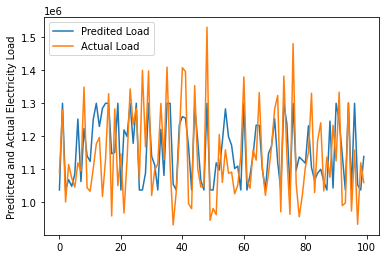

In [206]:
plt.plot(x[:100], predictions[:100])
plt.plot(x[:100], Y_test[:100])
plt.ylabel('Predicted and Actual Electricity Load')
plt.legend(['Predited Load', 'Actual Load'])
plt.show()